In [1]:

#!/usr/bin/env python
# coding: utf-8

# go to anaconda prompt
# pip install gym
# python taxiRL.py


In [2]:

import gym

from IPython.display import clear_output
from time import sleep
import os
import numpy as np

import random
from IPython.display import clear_output


from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

env = gym.make("Taxi-v3", render_mode="rgb_array")


In [4]:

env.reset()


env.render()

env.reset()
env.render()



array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]

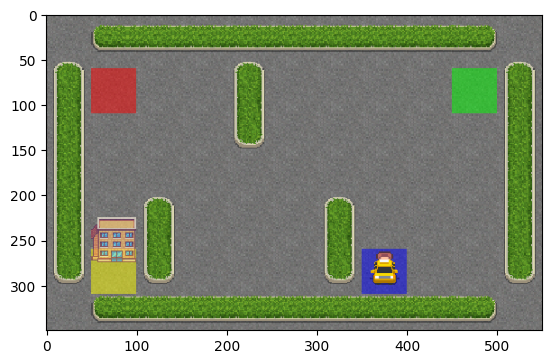

In [5]:


img = plt.imshow(env.render()) # only call this once

for _ in range(100):
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)


In [6]:

print(   "Action Space {}".format(env.action_space)  )
print(   "State Space {}".format(env.observation_space)  )


state = env.encode(3, 1, 2, 0)

print("State: ", state)


Action Space Discrete(6)
State Space Discrete(500)
State:  328


In [7]:


env.s = state

env.render()

print(env.P[328])
 
env.s = 328

epochs = 0

penalties = 0
reward = 0

frames = []

done = False


{0: [(1.0, 428, -1, False)], 1: [(1.0, 228, -1, False)], 2: [(1.0, 348, -1, False)], 3: [(1.0, 328, -1, False)], 4: [(1.0, 328, -10, False)], 5: [(1.0, 328, -10, False)]}


In [8]:


while not done:
    action = env.action_space.sample()
    ## thing = env.step(action)
    ## print(thing)
    state, reward, done, info, _ = env.step(action)
    if reward == -10:
        penalties += 1
    frames.append({
        'frame': env.render(),           #mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
    epochs += 1


In [9]:

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))



Timesteps taken: 3190
Penalties incurred: 1063


In [10]:


def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        #os.system('clear')
        os.system('cls')
        print(  frame['frame'] )
        print("Timestep: {}".format(i + 1))
        print("State: {}".format(  frame['state']  ))
        print("Action: {}".format(  frame['action']  ) )
        print("Reward: {}".format(  frame['reward']   ))
        sleep(.1)


In [11]:
def print_frames2(frames):
    img = plt.imshow(env.render()) # only call this once
    for i, frame in enumerate(frames):
        ## img.set_data(env.render()) # just update the data
        ## print(env.render())
        ## print(frame['frame'])
        img.set_data(frame['frame'])
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##action = env.action_space.sample()
        #env.step(action)

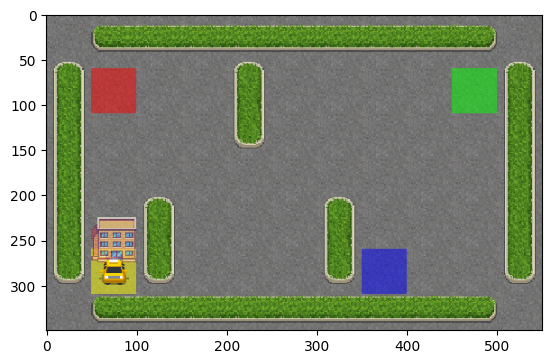

In [12]:


print_frames2(frames)   ##uncomment to view animation



In [13]:

#############################################################
## now add Q table

q_table = np.zeros([env.observation_space.n, env.action_space.n])

##%%time


In [14]:


alpha = 0.1
gamma = 0.6
epsilon = 0.1

all_epochs = []
all_penalties = []


In [15]:

for i in range(1, 100001):
    state = env.reset()[0]
    
    epochs, penalties, reward = 0, 0, 0
    done = False
    while not done:
       
        ## print(state)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() #random action
        else:
            action = np.argmax(q_table[state]) # select optimal action in Q table for state
        next_state, reward, done, info, _ = env.step(action)
        old_value =q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max )
        q_table[state, action] = new_value
        
        if reward == -10:
            penalties = penalties + 1
        
        state = next_state
        epochs = epochs + 1

    if i % 100 == 0:
        os.system('cls')
        print("Episode: {}".format(i))


Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Episode: 2100
Episode: 2200
Episode: 2300
Episode: 2400
Episode: 2500
Episode: 2600
Episode: 2700
Episode: 2800
Episode: 2900
Episode: 3000
Episode: 3100
Episode: 3200
Episode: 3300
Episode: 3400
Episode: 3500
Episode: 3600
Episode: 3700
Episode: 3800
Episode: 3900
Episode: 4000
Episode: 4100
Episode: 4200
Episode: 4300
Episode: 4400
Episode: 4500
Episode: 4600
Episode: 4700
Episode: 4800
Episode: 4900
Episode: 5000
Episode: 5100
Episode: 5200
Episode: 5300
Episode: 5400
Episode: 5500
Episode: 5600
Episode: 5700
Episode: 5800
Episode: 5900
Episode: 6000
Episode: 6100
Episode: 6200
Episode: 6300
Episode: 6400
Episode: 6500
Episode: 6600
Episode: 6700
Episode: 6800
Episode: 6900
Episode: 7000
Episode: 7100
Episode: 7200
E

Episode: 55600
Episode: 55700
Episode: 55800
Episode: 55900
Episode: 56000
Episode: 56100
Episode: 56200
Episode: 56300
Episode: 56400
Episode: 56500
Episode: 56600
Episode: 56700
Episode: 56800
Episode: 56900
Episode: 57000
Episode: 57100
Episode: 57200
Episode: 57300
Episode: 57400
Episode: 57500
Episode: 57600
Episode: 57700
Episode: 57800
Episode: 57900
Episode: 58000
Episode: 58100
Episode: 58200
Episode: 58300
Episode: 58400
Episode: 58500
Episode: 58600
Episode: 58700
Episode: 58800
Episode: 58900
Episode: 59000
Episode: 59100
Episode: 59200
Episode: 59300
Episode: 59400
Episode: 59500
Episode: 59600
Episode: 59700
Episode: 59800
Episode: 59900
Episode: 60000
Episode: 60100
Episode: 60200
Episode: 60300
Episode: 60400
Episode: 60500
Episode: 60600
Episode: 60700
Episode: 60800
Episode: 60900
Episode: 61000
Episode: 61100
Episode: 61200
Episode: 61300
Episode: 61400
Episode: 61500
Episode: 61600
Episode: 61700
Episode: 61800
Episode: 61900
Episode: 62000
Episode: 62100
Episode: 6

In [16]:



print("Training Finished\n")

print(q_table[328]) ## should predict 1 (north)


Training Finished

[ -2.40871816  -2.27325184  -2.40852704  -2.35781334 -10.96235309
 -10.60216403]


In [17]:

#############################################################
## evaluate the agent now that we have learned the Q table after 100,000 tries

total_epochs, total_penalties = 0, 0
episodes = 100


In [18]:


for _ in range(episodes):
    state = env.reset()[0]
    epochs, penalties, reward = 0, 0, 0
    done = False
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info, _ = env.step(action)

        if reward == -10:
            penalties = penalties + 1
        epochs = epochs + 1

    total_penalties = total_penalties + penalties
    total_epochs = total_epochs + epochs

    

In [19]:



    
print("Results after {} episodes: ".format(episodes))
print("Average time steps per episode: {} ".format(total_epochs / episodes) )
print("average penalties per episode: {} ".format(total_penalties/episodes) )





Results after 100 episodes: 
Average time steps per episode: 13.11 
average penalties per episode: 0.0 
